# Hypothesis
As of recent PC sales (in regards to gaming) are increasing as console sales decrease.

# Data Wrangling

### Steam Hardware survey
To gather data on PC sales trends from 2008 to present

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/jdegene/steamHWsurvey/master/shs.csv"
steam_df = pd.read_csv(url)
steam_df.head()


,date,category,name,change,percentage
0,2008-11-01,AMD CPU Speeds,1.4 Ghz to 1.49 Ghz,-0.0004,0.0036
1,2008-11-01,AMD CPU Speeds,1.5 Ghz to 1.69 Ghz,-0.0025,0.0224
2,2008-11-01,AMD CPU Speeds,1.7 Ghz to 1.99 Ghz,-0.0024,0.0714
3,2008-11-01,AMD CPU Speeds,2.0 Ghz to 2.29 Ghz,-0.0040,0.1343
4,2008-11-01,AMD CPU Speeds,2.3 Ghz to 2.69 Ghz,0.0001,0.0727


### VGChartz
To gather data on console sales trends from 2008 to present

In [2]:
import pandas as pd

vg_df = pd.read_csv("vgchartz-11_23_2025.csv")
vg_df.head()
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img            400 non-null    object 
 1   title          400 non-null    object 
 2   console        400 non-null    object 
 3   genre          400 non-null    object 
 4   publisher      400 non-null    object 
 5   developer      400 non-null    object 
 6   vg_score       70 non-null     float64
 7   critic_score   191 non-null    float64
 8   user_score     26 non-null     float64
 9   total_shipped  182 non-null    float64
 10  total_sales    218 non-null    float64
 11  na_sales       217 non-null    float64
 12  jp_sales       129 non-null    float64
 13  pal_sales      217 non-null    float64
 14  other_sales    218 non-null    float64
 15  release_date   397 non-null    object 
 16  last_update    161 non-null    object 
dtypes: float64(9), object(8)
memory usage: 53.3+ KB


# Compare and Visualize data
Compare trends from 2008 to current day

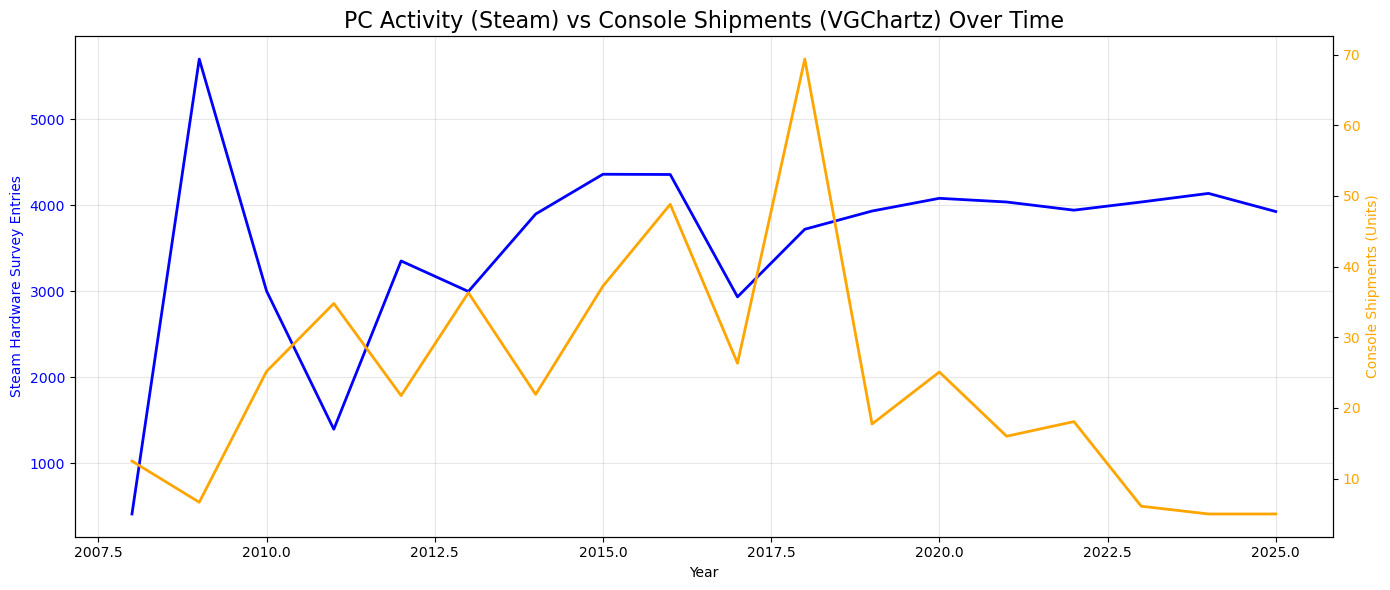

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Datasets ---
steam_df = pd.read_csv(
    "https://raw.githubusercontent.com/jdegene/steamHWsurvey/master/shs.csv",
    parse_dates=["date"]
)

vg_df = pd.read_csv("vgchartz-11_23_2025.csv")

# --- Prep Steam Data (yearly counts) ---
steam_df['year'] = steam_df['date'].dt.year
steam_yearly = steam_df.groupby('year').size()

# --- Prep VGChartz Data (yearly, 2008+) ---
vg_df['release_date'] = pd.to_datetime(vg_df['release_date'], errors='coerce')
vg_df['year'] = vg_df['release_date'].dt.year
vg_yearly = vg_df[vg_df['year'] >= 2008].groupby('year')['total_shipped'].sum()

# --- Plot with dual y-axes ---
fig, ax1 = plt.subplots(figsize=(14,6))

# Left y-axis: Steam
ax1.plot(steam_yearly.index, steam_yearly.values, color='blue', linewidth=2, label="Steam (PC)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Steam Hardware Survey Entries", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis: Console
ax2 = ax1.twinx()
ax2.plot(vg_yearly.index, vg_yearly.values, color='orange', linewidth=2, label="Console Shipments")
ax2.set_ylabel("Console Shipments (Units)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and grid
plt.title("PC Activity (Steam) vs Console Shipments (VGChartz) Over Time", fontsize=16)
ax1.grid(alpha=0.3)
fig.tight_layout()
plt.show()

#Used chatgpt to help with visualization


# Conclusion

PC sales started strong around 2008, but was rivaled by Consoles for much of the 2010s before dropping off in popularity shortly before 2020.

## Blindspots

Perhaps there could be discrepancies in the data due to the amount of people from each group that decide to report their purchase. However, the overall trends should still be visible regardless of total volume.

This makes me wonder why there was such a large dropoff in console sales between 2018 and 2019.